<a href="https://colab.research.google.com/github/sun-gif/data-scientist-projects/blob/master/Multi_Classification_model_for_Human_activity_prediction_based_on_smartphone_data_sets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Overview **

Sensor signals from smartphones of a group of 30 people performed a protocol of activities(such as walking,sitting ,lying and walking stairs) were collected,pre-processed and labeled.The experiment also included postural transitions that occurred between the static postures. These are: stand-to-sit, sit-to-stand, sit-to-lie, lie-to-sit, stand-to-lie, and lie-to-stand

With the above data sets ,we may be able to detect human activity, or different age group activity, or further identify the participants from their activity styles , or even help to detect early signal of sickness

After processing and exploratory the data, a couple of multi classification model such as random forest, logistic regression  are used to train ,validate and predict the data.
Evaluation matrix used: Accuracy,confusion Matrix, F1_Score and Roc Curve


Data:  UCI http://archive.ics.uci.edu/ml/datasets/Smartphone-Based+Recognition+of+Human+Activities+and+Postural+Transitions

**Phase I**: Load data, exploratory data analysis







In [0]:
#1) Load data
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

In [0]:
import io
X_train= pd.read_csv(io.BytesIO(uploaded['X_train.txt']),sep=" ",header=None)
y_train= pd.read_csv(io.BytesIO(uploaded['y_train.txt']),sep=" ",header=None)
X_test= pd.read_csv(io.BytesIO(uploaded['X_test.txt']),sep=" ",header=None)
y_test= pd.read_csv(io.BytesIO(uploaded['y_test.txt']),sep=" ",header=None)
X_train.head()

KeyError: ignored

In [0]:
#2) identify if there is missing data
# Concatenate train & test


dataset = pd.concat(objs=[X_train, X_test], axis=0)
ydataset = pd.concat(objs=[y_train, y_test], axis=0)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10929 entries, 0 to 3161
Columns: 561 entries, 0 to 560
dtypes: float64(561)
memory usage: 46.9 MB


In [0]:
total=dataset.isnull().sum().sort_values(ascending=False)
percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
560,0,0.0
183,0,0.0
189,0,0.0
188,0,0.0
187,0,0.0


In [0]:
# 3)*train test split(our dataset already splited, actually don't need do this)
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(
dataset,ydataset, test_size=0.20, random_state=0, shuffle = True)

In [0]:
# 4)*using ‘k-NN impute' to fill missing data(our data set doesn't have missing data, we actually don't need do this)
import numpy as np
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
print(imputer.fit_transform(X_train))

[[ 0.04357967 -0.00597022 -0.03505434 ... -0.84155851  0.17991281
  -0.05171842]
 [ 0.03948004 -0.00213128 -0.02906736 ... -0.8450924   0.18026111
  -0.04743634]
 [ 0.03997778 -0.00515272 -0.02265071 ... -0.84923013  0.18060956
  -0.04227136]
 ...
 [ 0.03745094 -0.00272442  0.02100941 ... -0.77956634  0.24912145
   0.04707077]
 [ 0.04401105 -0.00453578 -0.0512422  ... -0.78560327  0.24640867
   0.03170003]
 [ 0.06895376  0.00181032 -0.08032343 ... -0.78369253  0.24678499
   0.04298129]]


In [0]:
# 5)identify unbanlance data
m=len(y_train)/12
y_train.groupby([0]).size()


0
1     1226
2     1073
3      987
4     1293
5     1423
6     1413
7       47
8       23
9       75
10      60
11      90
12      57
dtype: int64

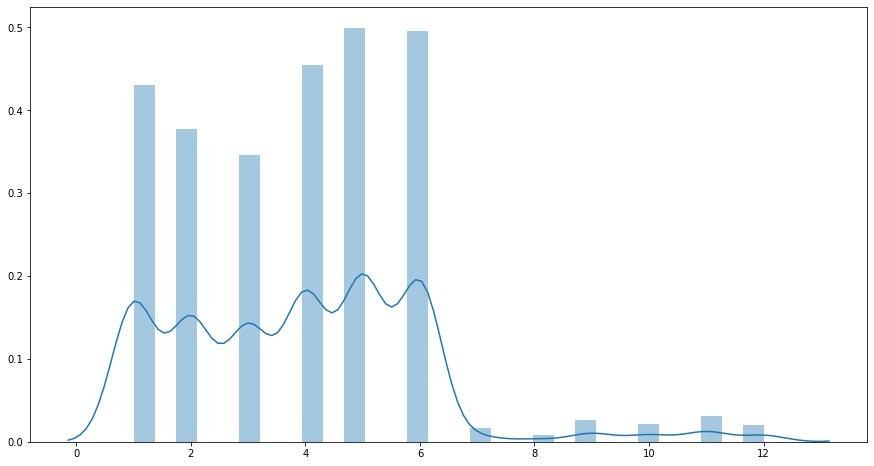

In [0]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.distplot(y_train, bins =30)

In [0]:
#6) using SMOTE sampling to make data more balanced(from above we can see our data is not balance it has 6 major class and 6 miner class)

from imblearn.over_sampling import SMOTE
 
smote = SMOTE(kind = "regular")
X_sm, y_sm = smote.fit_sample(X_train, y_train)
len(X_sm)
X_sm.shape

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

(17076, 561)

In [0]:
# 7)Identify which columns/variables are numerical and which are categorical(there is no categorical columns for our data)


num_cols = dataset._get_numeric_data().columns

num_cols

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            551, 552, 553, 554, 555, 556, 557, 558, 559, 560],
           dtype='int64', length=561)

#8Identify outlier,*italicized text*

NameError: ignored

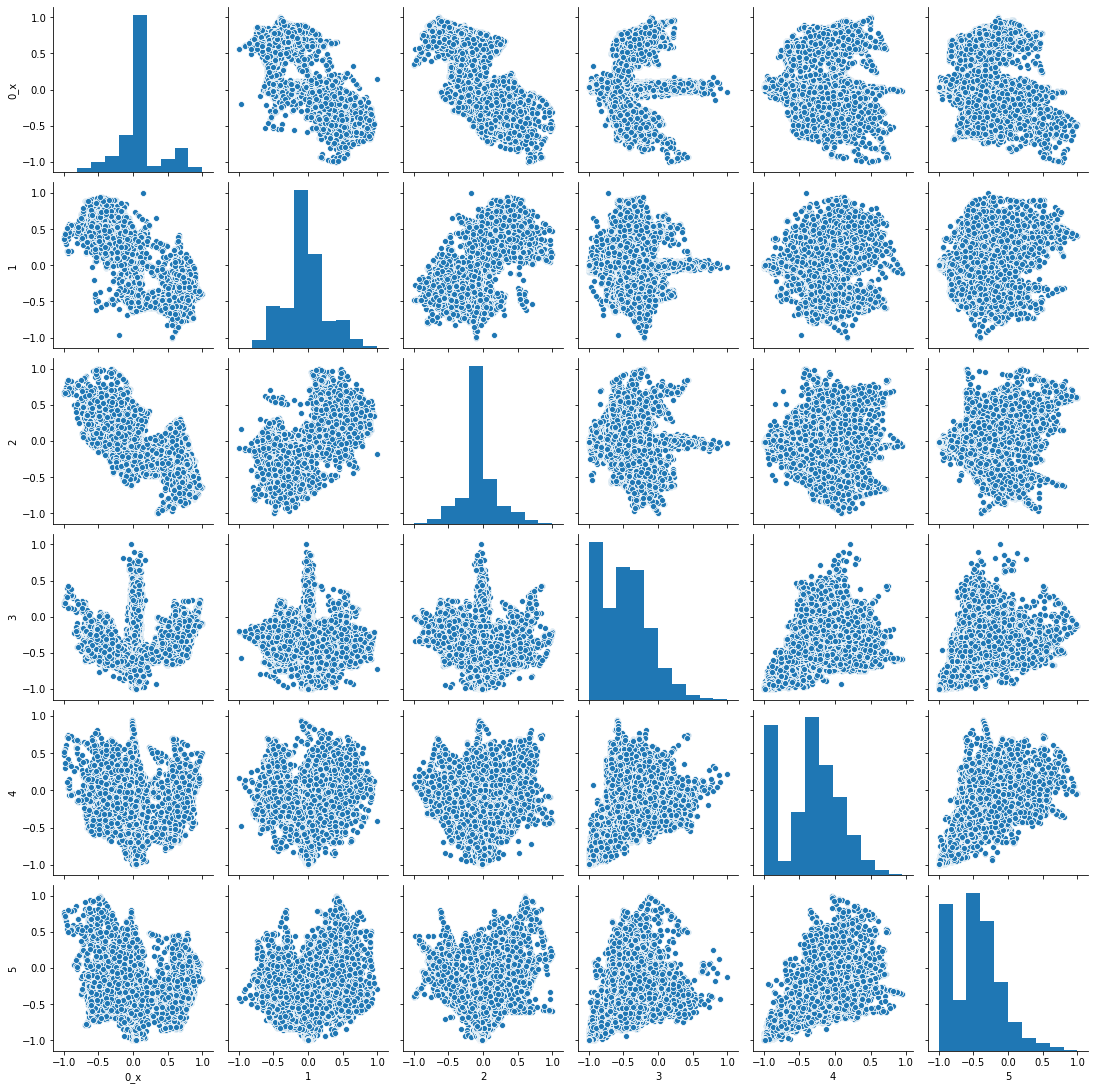

In [0]:
#8)Exploratory data analysis
#Plot pairs of numeric variables  (plot shows variable 0 are linear  related with variable 1 and 2 )

# library & dataset
import seaborn as sns
import pandas as pd
new_df = pd.merge(pd.DataFrame(X_sm), pd.DataFrame(y_sm),  how='left', left_index=True, right_index = True)
new_df.head()
column=['0_x',1,2,3,4,5]
dfp=new_df[column]
dfp.head()
sns.pairplot(dfp)

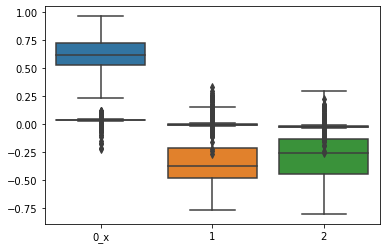

In [0]:
#boxplot show different patten for class 4 and 10
new_d4=new_df[new_df['0_y']==4]
len(new_d4)
new_d10=new_df[new_df['0_y']==10]
len(new_d10)
sns.boxplot(data=new_d10.iloc[:,0:3])
sns.boxplot(data=new_d4.iloc[:,0:3])

In [0]:
#9)Apply principal components analysis to just input variable(PCA shows we can reduce the dimension to 14 components we still can keep 80% var)
from sklearn.decomposition import PCA

pca = PCA(n_components=0.8)
x_pca = pca.fit_transform(X_sm)
X_sm.shape, x_pca.shape

((17076, 561), (17076, 14))

In [0]:
# Phase II: Pre-processing
#1)numerical columns(we do the standard scaling)
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_trainp=scaler.transform(X_sm)
X_testp=scaler.transform(X_test)
X_trainp

array([[ 4.72690278e-02, -5.32536396e-02, -1.87937459e-01, ...,
        -6.98332451e-01,  4.30793616e-01,  4.23380815e-03],
       [ 7.07236314e-03, -1.48515677e-02, -1.21357287e-01, ...,
        -7.05271912e-01,  4.31951346e-01,  1.97385973e-02],
       [ 1.19527108e-02, -4.50759014e-02, -4.99988185e-02, ...,
        -7.13397137e-01,  4.33109572e-01,  3.84402246e-02],
       ...,
       [ 5.83456495e+00, -7.29852324e+00, -2.91746277e+00, ...,
         7.18533502e-01, -1.81583721e+00,  1.28431218e-01],
       [ 5.54969359e+00, -6.66147082e+00,  1.52471184e+00, ...,
         5.83300389e-01, -1.71358424e+00,  2.32904684e-01],
       [ 8.92738305e+00, -3.55848253e+00, -6.54171634e+00, ...,
         2.02635020e+00, -1.84753973e+00, -1.56496270e+00]])

In [0]:
#Phase III: Build a initial-model (with some guess parameters)
#1) multinomial logistic  regression


from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0,multi_class='multinomial').fit(X_trainp, y_sm)
clf.predict(X_testp)

clf.predict_proba(X_testp)

clf.score(X_testp, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9380139152435167

In [0]:
#2)randomforest model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=13, n_estimators=320,random_state=0,oob_score=True)
clf.fit(X_trainp, y_sm)
clf.feature_importances_

clf.predict(X_testp)
clf.score( X_testp, y_test)

0.9146110056925996

In [0]:
#Phase IV: Tune model parameters & evaluate
#1)tune with gridserch cv for randonForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  accuracy_score,make_scorer
rf = RandomForestClassifier( random_state=0)
from sklearn.model_selection import GridSearchCV
scorer = make_scorer(accuracy_score)
parameters = {'max_depth':[7,13,18,21], 'n_estimators':[360,300,240]}

grid_obj= GridSearchCV(estimator=rf, cv=5,param_grid=parameters,scoring=scorer)

grid_fit = grid_obj.fit(X_trainp, y_sm)

# Get the estimator
best_clf = grid_fit.best_estimator_

In [0]:
print(best_clf)

best_predictions = best_clf.predict(X_testp)
best_clf.score(X_testp,y_test)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=18, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


0.915876027830487

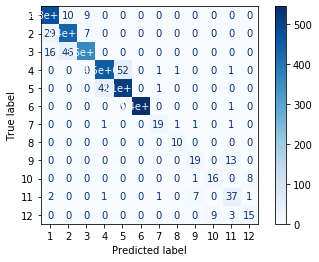

In [0]:
#2)Other Evaluation: 


# Confusion Matrix


from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(best_clf, X_testp, y_test,
                                 cmap=plt.cm.Blues)

In [0]:
#F1 Score
from sklearn.metrics import f1_score
f1_score(y_test, best_clf.predict(X_testp),average=None)

array([0.93529412, 0.9043659 , 0.90176322, 0.90149254, 0.91525424,
       0.99908173, 0.84444444, 0.90909091, 0.63333333, 0.64      ,
       0.7047619 , 0.58823529])

In [0]:
#ROC
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
# Compute ROC curve and ROC area for each class
# Binarize the output
y = label_binarize(y_test, classes=[1, 2,3,4,5,6,7,8,9,10,11,12])
n_classes = y.shape[1]
y_score=f1_score(y_test, best_clf.predict(X_testp),average=None)


yscore=best_clf.predict_proba(X_testp)

In [0]:
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y[:, i], yscore[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

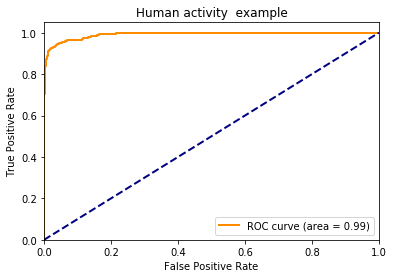

In [0]:
fpr["micro"], tpr["micro"], _ = roc_curve(y.ravel(), yscore.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
from scipy import interp
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Human activity  example')
plt.legend(loc="lower right")
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  # Remove the CWD from sys.path while we load stuff.


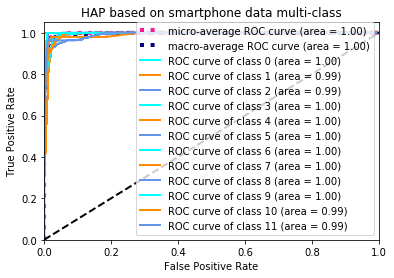

In [0]:

from itertools import cycle
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y.ravel(), yscore.ravel())# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.00, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('HAP based on smartphone data multi-class')
plt.legend(loc="lower right")
plt.show()
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [0]:
from sklearn.metrics import roc_auc_score
y_prob = best_clf.predict_proba(X_testp)

macro_roc_auc_ovo = roc_auc_score(y, y_prob, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(y, y_prob, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(y, y_prob, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(y, y_prob, multi_class="ovr",
                                     average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.995916 (macro),
0.995463 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.995916 (macro),
0.995463 (weighted by prevalence)


#conclusion
Compare Logistis regression with radom Forest, Actuary Score is quite similar,both over 90%. For random Forest ,roc auc scores is over 99%